In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [115]:
df=pd.read_csv('voice-classification.csv')

In [116]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [117]:
df.isna().count()

meanfreq    3168
sd          3168
median      3168
Q25         3168
Q75         3168
IQR         3168
skew        3168
kurt        3168
sp.ent      3168
sfm         3168
mode        3168
centroid    3168
meanfun     3168
minfun      3168
maxfun      3168
meandom     3168
mindom      3168
maxdom      3168
dfrange     3168
modindx     3168
label       3168
dtype: int64

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

<AxesSubplot:>

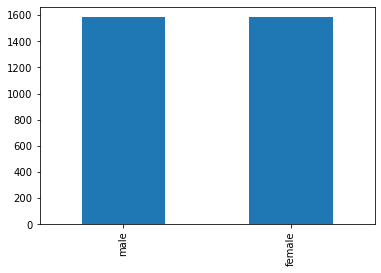

In [119]:
df['label'].value_counts().plot(kind='bar')

In [120]:
df['label'].replace(to_replace=['male','female'],value=[1,0],inplace=True)

In [121]:
df['label'].head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

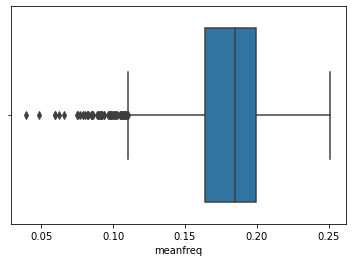

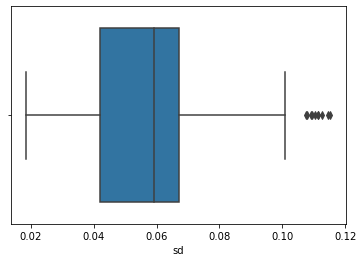

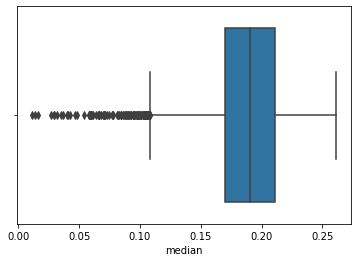

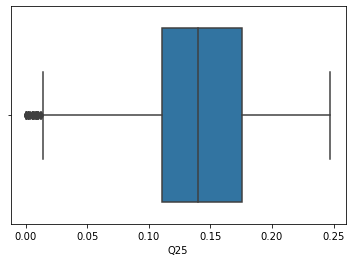

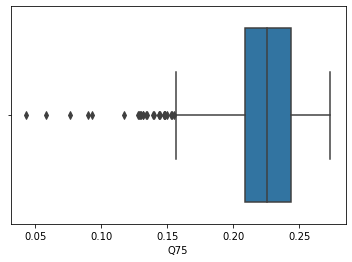

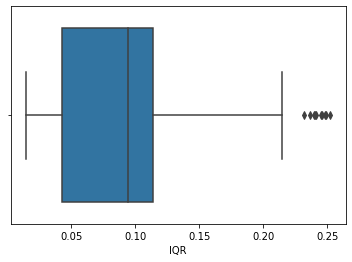

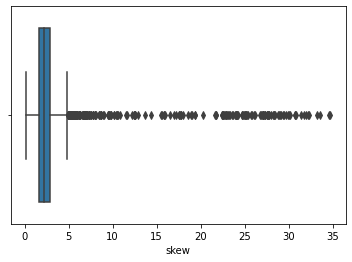

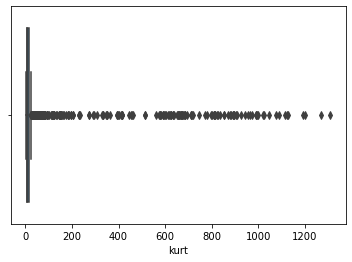

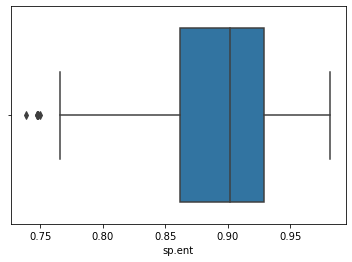

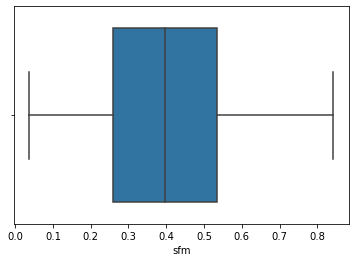

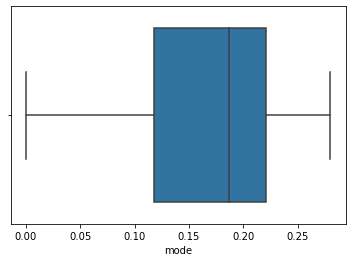

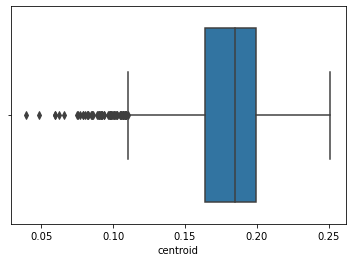

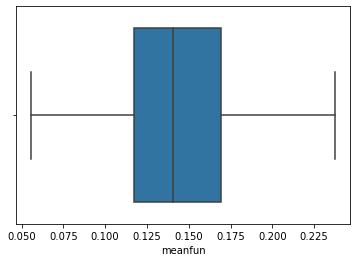

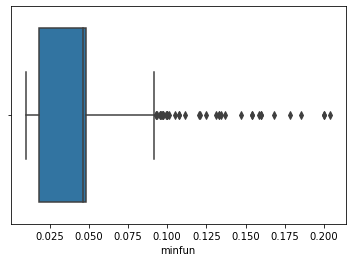

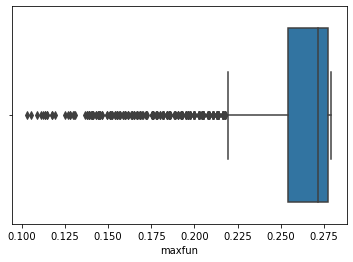

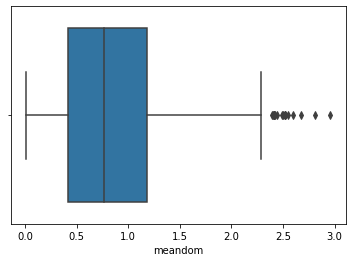

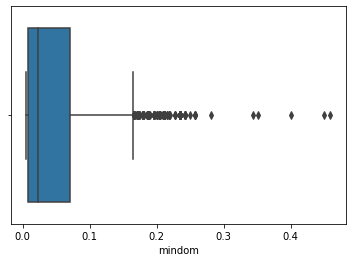

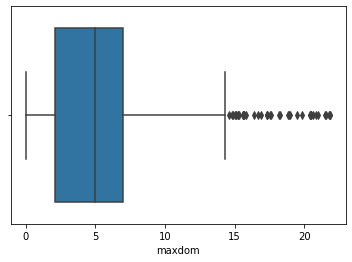

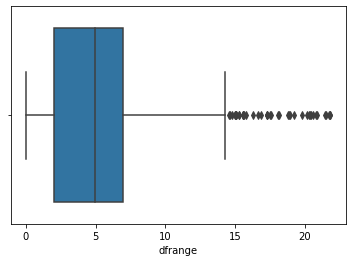

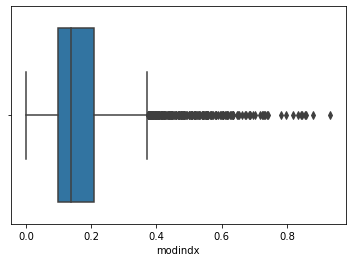

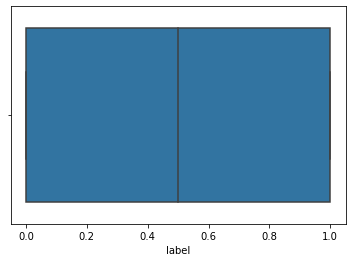

In [122]:
for i in df.columns:
    sns.boxplot(x=i,data=df)
    plt.show()

In [123]:
def Outlier(data):
    for column in data.drop(['label'], axis=1).columns:
        if data[column].dtype != object:
            Q1 = np.percentile(data[column],25)
            Q3 = np.percentile(data[column],75)
            IQR =  Q3 - Q1
            lower = Q1 - (1.5 * IQR) # min value allowed
            upper = Q3 + (1.5 * IQR)  # max. value allowed
            data.loc[:,column] = np.where(data[column].values > upper, upper, data[column].values)
            data.loc[:,column] = np.where(data[column].values < lower, lower, data[column].values)
           
    return data

df2 = Outlier(df)
df2.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

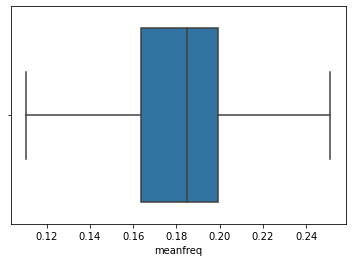

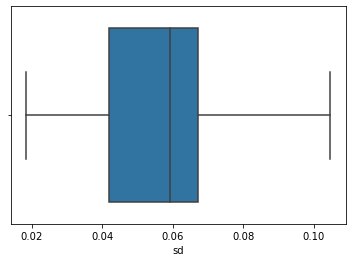

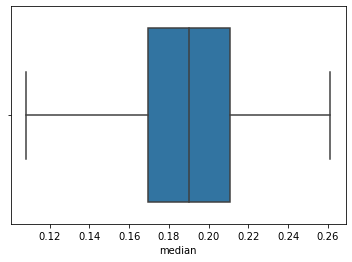

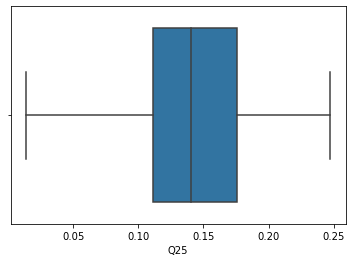

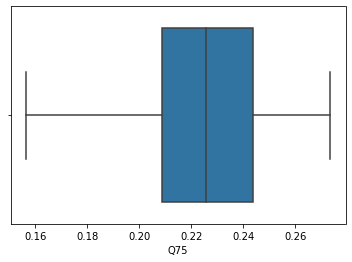

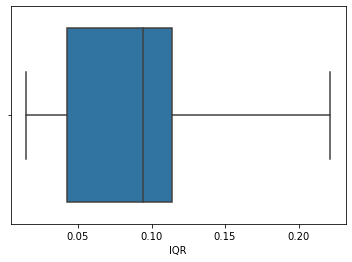

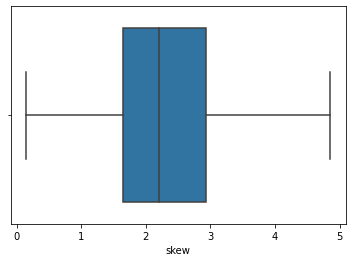

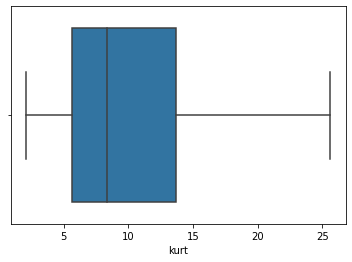

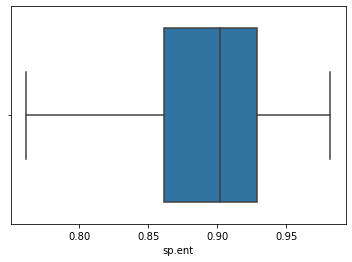

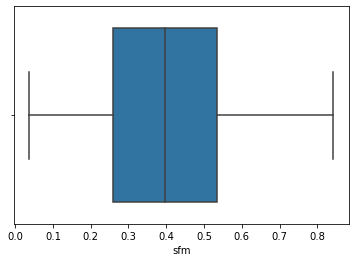

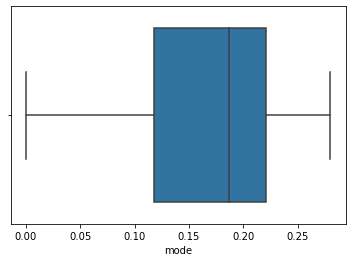

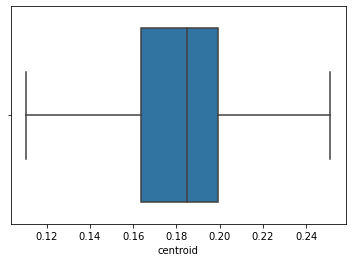

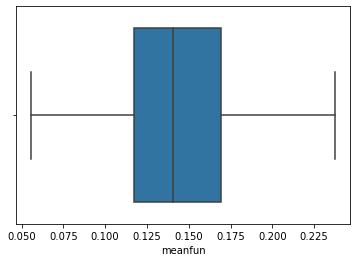

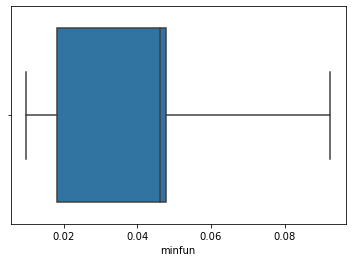

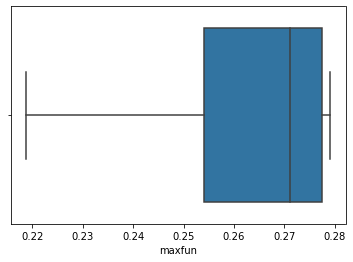

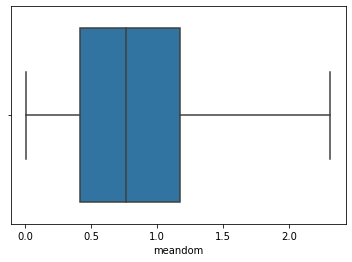

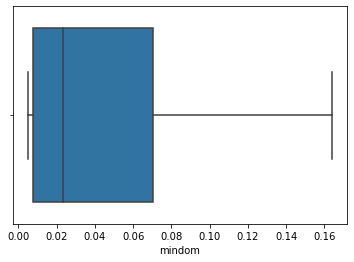

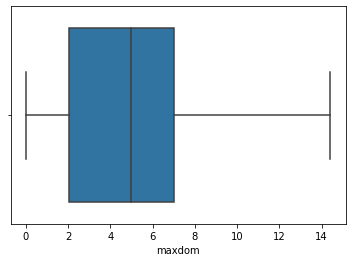

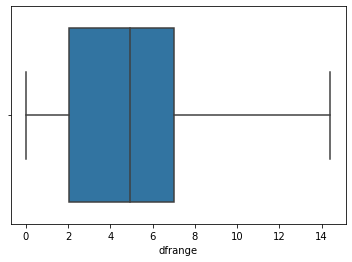

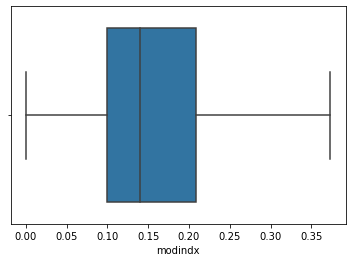

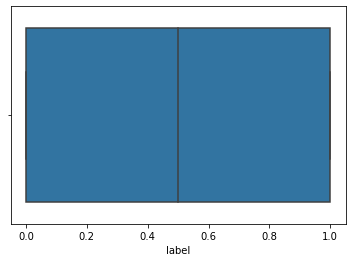

In [124]:
for i in df.columns:
    sns.boxplot(x=i,data=df2)
    plt.show()

In [125]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   int6

In [126]:
df2.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.752436,0.919382,0.914325,0.724666,-0.643965,-0.198809,-0.281973,-0.625400,-0.804414,...,1.000000,0.470998,0.433548,0.326948,0.545416,0.213050,0.542526,0.538259,-0.243707,-0.345230
sd,-0.752436,1.000000,-0.572573,-0.846586,-0.160435,0.873707,0.046537,0.153101,0.725669,0.842202,...,-0.752436,-0.469503,-0.378486,-0.130705,-0.483409,-0.369611,-0.495086,-0.488386,0.158225,0.482499
median,0.919382,-0.572573,1.000000,0.771874,0.710397,-0.490778,-0.196279,-0.273068,-0.535771,-0.689246,...,0.919382,0.443538,0.389097,0.314822,0.470194,0.173172,0.466585,0.463115,-0.236381,-0.304755
Q25,0.914325,-0.846586,0.771874,1.000000,0.471467,-0.874708,-0.039596,-0.128909,-0.658254,-0.771362,...,0.914325,0.547683,0.349066,0.212339,0.467991,0.294332,0.471569,0.465896,-0.157045,-0.514374
Q75,0.724666,-0.160435,0.710397,0.471467,1.000000,0.008553,-0.340702,-0.351148,-0.187943,-0.392376,...,0.724666,0.151546,0.301875,0.367209,0.365713,-0.063983,0.350505,0.351139,-0.230362,0.077605
IQR,-0.643965,0.873707,-0.490778,-0.874708,0.008553,1.000000,-0.142838,-0.046032,0.651958,0.668686,...,-0.643965,-0.539442,-0.231453,-0.047869,-0.333005,-0.365038,-0.346893,-0.340169,0.059118,0.623936
skew,-0.198809,0.046537,-0.196279,-0.039596,-0.340702,-0.142838,1.000000,0.959668,-0.347500,-0.052953,...,-0.198809,0.025708,-0.220255,-0.215730,-0.331112,0.119027,-0.315551,-0.317609,0.042763,-0.189236
kurt,-0.281973,0.153101,-0.273068,-0.128909,-0.351148,-0.046032,0.959668,1.000000,-0.199240,0.069229,...,-0.281973,-0.046473,-0.272505,-0.222874,-0.376365,0.064214,-0.368861,-0.369948,0.088330,-0.115892
sp.ent,-0.625400,0.725669,-0.535771,-0.658254,-0.187943,0.651958,-0.347500,-0.199240,1.000000,0.867480,...,-0.625400,-0.513477,-0.326045,-0.120187,-0.294634,-0.294944,-0.332186,-0.326758,0.264390,0.490888
sfm,-0.804414,0.842202,-0.689246,-0.771362,-0.392376,0.668686,-0.052953,0.069229,0.867480,1.000000,...,-0.804414,-0.421066,-0.400254,-0.209468,-0.429008,-0.294042,-0.447368,-0.442006,0.270674,0.357499


In [136]:
X=df2.drop(['label','modindx','Q75'],axis=1)
Y=df2['label']

In [138]:
from sklearn.preprocessing import MinMaxScaler
mc=MinMaxScaler()
mc.fit(X)
X = mc.transform(X)

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=2021)

In [141]:
x_train[:1]

array([[0.59369736, 0.69743127, 0.74127243, 0.74262233, 0.22837457,
        0.42597494, 0.24280869, 0.69613217, 0.59171971, 0.78425358,
        0.59369736, 0.6872114 , 0.08233639, 0.94614195, 0.10191626,
        0.31288344, 0.05260304, 0.04932584]])

In [142]:
x_train_mc[:1]

array([[0.59369736, 0.69743127, 0.74127243, 0.74262233, 0.22837457,
        0.37450226, 0.24280869, 0.7074063 , 0.59171971, 0.78425358,
        0.59369736, 0.6872114 , 0.08233639, 0.94614195, 0.10191626,
        0.31288344, 0.05260304, 0.04932584]])

In [143]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [144]:
pred_train=svc.predict(x_test)

In [145]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(classification_report(y_test,pred_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       477
           1       0.99      0.98      0.99       474

    accuracy                           0.99       951
   macro avg       0.99      0.99      0.99       951
weighted avg       0.99      0.99      0.99       951

